### Naive Bayes Classification for Face-Mask Detection



#### Import Libraries

In [1]:
# Import Libraries
import numpy as np 

import sklearn
import sklearn.naive_bayes
from sklearn.model_selection import train_test_split

import pickle
import cv2
from cv2 import cv2

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### EDA


In [2]:
x_path = '/content/drive/MyDrive/Face Detection Dataset/data_pickle/X.pickle'
y_path = '/content/drive/MyDrive/Face Detection Dataset/data_pickle/y.pickle'

X = pickle.load(open(x_path, 'rb'))
y = pickle.load(open(y_path, 'rb'))

CATEGORIES = ['Without Mask', 'Incorrectly Wearing Mask', 'Wearing Mask']

In [3]:
print('Type X:', type(X))
print('Type y:', type(y), end='\n\n')

print('X Shape:', X.shape)
print('y Shape:', y.shape)

Type X: <class 'numpy.ndarray'>
Type y: <class 'numpy.ndarray'>

X Shape: (17687, 224, 224)
y Shape: (17687,)


Random Image from X:



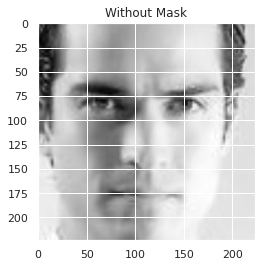

In [4]:
index = 1113
random_img = X[index]
random_img_label = CATEGORIES[y[index]]

print('Random Image from X:')
plt.imshow(random_img, cmap='gray')
plt.title(random_img_label)

print()

In [5]:
# Reshape the size to reduce RAM consumption
reshaped_size = 64
print('Before Reshaping size:', X.shape)

resized_X = []
for img in X:
  resized_X.append(cv2.resize(img, (reshaped_size, reshaped_size)))

X = np.asarray(resized_X)
del resized_X

print('After Reshaping Size: ', X.shape)

Before Reshaping size: (17687, 224, 224)
After Reshaping Size:  (17687, 64, 64)


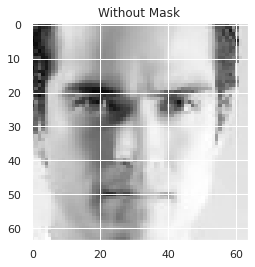

In [6]:
plt.imshow(X[index], cmap='gray')
plt.title(CATEGORIES[y[index]])
print()

In [7]:
# Reshape into 1d for Naive Bayes 
print('Before Reshaping to 1D:', X.shape)
X = X.reshape(-1, reshaped_size*reshaped_size)
print('After Reshaping to 1D: ', X.shape)

Before Reshaping to 1D: (17687, 64, 64)
After Reshaping to 1D:  (17687, 4096)


Double Check: Img still holds after reshape (64, 64)



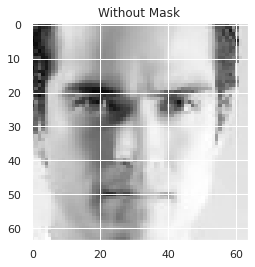

In [8]:
same_img = np.reshape(X[index], (reshaped_size, reshaped_size))
print('Double Check: Img still holds after reshape', same_img.shape)
plt.imshow(same_img, cmap='gray')
plt.title(CATEGORIES[y[index]])
print()

In [9]:
# Normalize the data
X = X / 255.0
print('Domain: [',X.min(),',', X.max(), ']')

Domain: [ 0.0 , 1.0 ]


In [10]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

#### GaussianNB w/o Hyperparameter tuning


In [11]:
# GaussianNB Building
gaussianNB_model = sklearn.naive_bayes.GaussianNB()

# Training
gaussianNB_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

GaussianNB Metrics

Accuracy: 0.779536

Recall: 0.779536

F1 Score: 0.779536



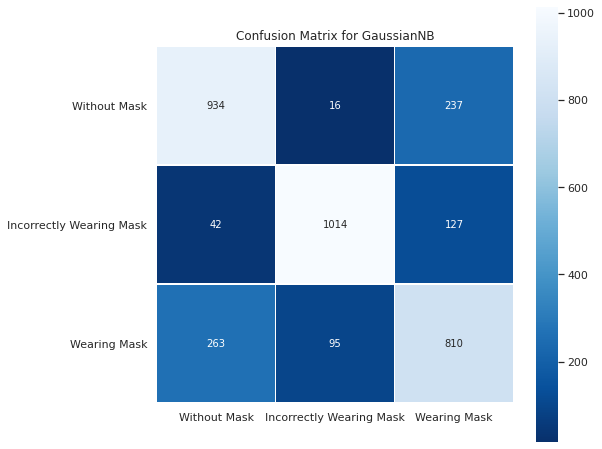

In [12]:
# Evaluation
gnb_y_pred = gaussianNB_model.predict(X_test)

print('GaussianNB Metrics', end='\n\n')
accuracy = sklearn.metrics.accuracy_score(y_test, gnb_y_pred)
print('Accuracy: %f' % accuracy, end='\n\n')

recall = sklearn.metrics.recall_score(y_test, gnb_y_pred, average='micro')
print('Recall: %f' % recall, end='\n\n')

f1_score = sklearn.metrics.f1_score(y_test, gnb_y_pred, average='micro')
print('F1 Score: %f' % f1_score)

cm = sklearn.metrics.confusion_matrix(y_test, gnb_y_pred)
# print('Confusion Matrix:')
# print(cm, end='\n\n')
plt.figure(figsize=(8,8), facecolor='w')
sns.heatmap(cm, annot=True, fmt='d', linewidths=.5, square=True,cmap='Blues_r', yticklabels=CATEGORIES, xticklabels=CATEGORIES)
plt.title('Confusion Matrix for GaussianNB')

print()

#### MultinomialNB w/o Hyperparameter Tuning

In [13]:
# MultinomialNB Building
multinomialNB_model = sklearn.naive_bayes.MultinomialNB()

In [14]:
# Training
multinomialNB_model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB Metrics

Accuracy: 0.687394

Recall: 0.687394

F1 Score: 0.687394



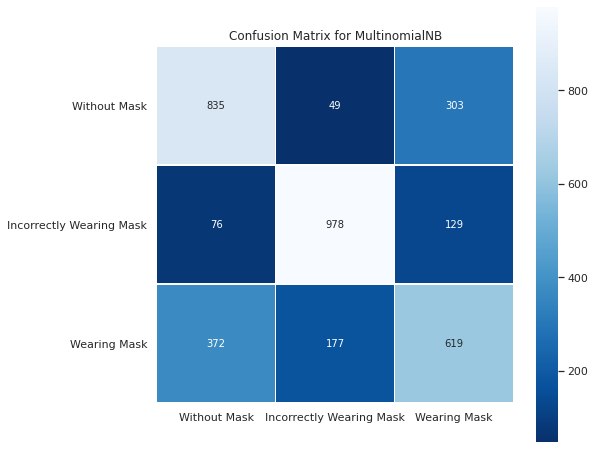

In [15]:
# Evaluate
mnb_y_pred = multinomialNB_model.predict(X_test)

print('MultinomialNB Metrics', end='\n\n')
accuracy = sklearn.metrics.accuracy_score(y_test, mnb_y_pred)
print('Accuracy: %f' % accuracy, end='\n\n')

recall = sklearn.metrics.recall_score(y_test, mnb_y_pred, average='micro')
print('Recall: %f' % recall, end='\n\n')

f1_score = sklearn.metrics.f1_score(y_test, mnb_y_pred, average='micro')
print('F1 Score: %f' % f1_score)

cm = sklearn.metrics.confusion_matrix(y_test, mnb_y_pred)
# print('Confusion Matrix:')
# print(cm, end='\n\n')
plt.figure(figsize=(8,8), facecolor='w')
sns.heatmap(cm, annot=True, fmt='d', linewidths=.5, square=True,cmap='Blues_r', yticklabels=CATEGORIES, xticklabels=CATEGORIES)
plt.title('Confusion Matrix for MultinomialNB')

print()

#### GaussianNB with Hyperparameter tuning

In [16]:
%%time

# Gridsearch for GaussianNB
params = {
    'var_smoothing' : [1e-09, 1e-07, 1e-05, 1e-03, 1, 100]
}

# Hyperparameter tuning
grid_search_cv = sklearn.model_selection.GridSearchCV(sklearn.naive_bayes.GaussianNB(), param_grid=params, scoring='accuracy', n_jobs=-1)

grid_search_cv.fit(X_train, y_train)

CPU times: user 870 ms, sys: 407 ms, total: 1.28 s
Wall time: 23.4 s


In [17]:
print('Best param for \'var_smoothing\':', grid_search_cv.best_params_)
print('With Accuracy of %f' % grid_search_cv.best_score_)

Best param for 'var_smoothing': {'var_smoothing': 0.001}
With Accuracy of 0.771927


GaussianNB with 'var_smoothing' of 0.001000 Metrics

Accuracy: 0.778689

Recall: 0.778689

F1 Score: 0.778689



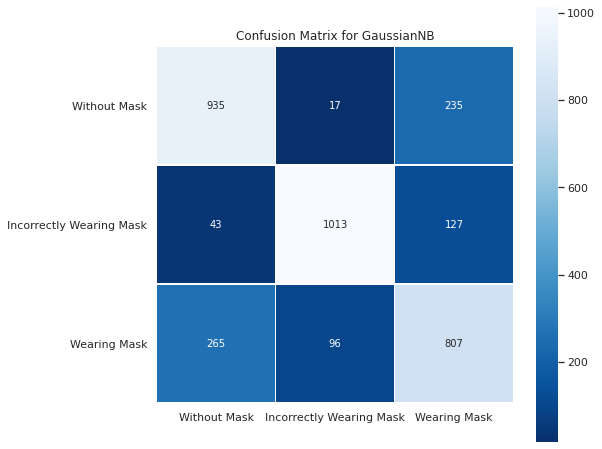

In [18]:
# Grab the best performing model
gnb_model = grid_search_cv.best_estimator_

gnb_gs_y_pred = gnb_model.predict(X_test)

print('GaussianNB with \'var_smoothing\' of %f Metrics' % grid_search_cv.best_params_['var_smoothing'], end='\n\n')
accuracy = sklearn.metrics.accuracy_score(y_test, gnb_gs_y_pred)
print('Accuracy: %f' % accuracy, end='\n\n')

recall = sklearn.metrics.recall_score(y_test, gnb_gs_y_pred, average='micro')
print('Recall: %f' % recall, end='\n\n')

f1_score = sklearn.metrics.f1_score(y_test, gnb_gs_y_pred, average='micro')
print('F1 Score: %f' % f1_score)

cm = sklearn.metrics.confusion_matrix(y_test, gnb_gs_y_pred)
# print('Confusion Matrix:')
# print(cm, end='\n\n')
plt.figure(figsize=(8,8), facecolor='w')
sns.heatmap(cm, annot=True, fmt='d', linewidths=.5, square=True,cmap='Blues_r', yticklabels=CATEGORIES, xticklabels=CATEGORIES)
plt.title('Confusion Matrix for GaussianNB')

print()

#### MultinomialNB with Hyperparameter tuning

In [19]:
# Hyperparameter tuning for multinomialnb
params = {
    'alpha' : [0.1, 0.5, 1, 2, 5, 100],
}
grid_search_cv = sklearn.model_selection.GridSearchCV(
    sklearn.naive_bayes.MultinomialNB(),
    param_grid=params,
    scoring='accuracy',
    n_jobs=-1
)

grid_search_cv.fit(X_train, y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.1, 0.5, 1, 2, 5, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [20]:
print('Best params:', grid_search_cv.best_params_)
print('With Accuracy of %f ' % grid_search_cv.best_score_)

Best params: {'alpha': 100}
With Accuracy of 0.681816 


MultinomialNB with 'alpha' of 100.000000 Metrics

Accuracy: 0.687394

Recall: 0.687394

F1 Score: 0.687394



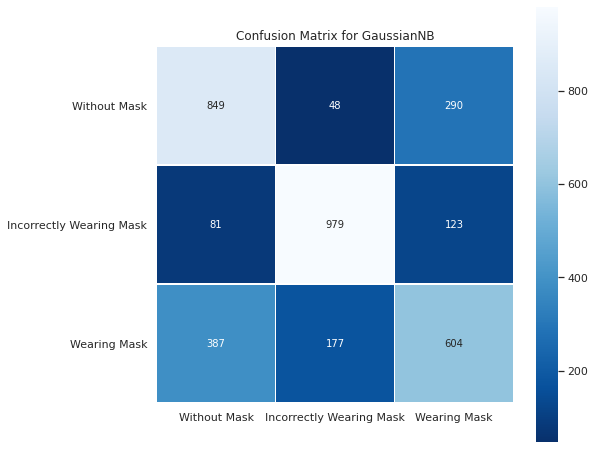

In [21]:
mnb_model = grid_search_cv.best_estimator_

mnb_gs_y_pred = mnb_model.predict(X_test)

print('MultinomialNB with \'alpha\' of %f Metrics' % grid_search_cv.best_params_['alpha'], end='\n\n')
accuracy = sklearn.metrics.accuracy_score(y_test, mnb_gs_y_pred)
print('Accuracy: %f' % accuracy, end='\n\n')

recall = sklearn.metrics.recall_score(y_test, mnb_gs_y_pred, average='micro')
print('Recall: %f' % recall, end='\n\n')

f1_score = sklearn.metrics.f1_score(y_test, mnb_gs_y_pred, average='micro')
print('F1 Score: %f' % f1_score)

cm = sklearn.metrics.confusion_matrix(y_test, mnb_gs_y_pred)
# print('Confusion Matrix:')
# print(cm, end='\n\n')
plt.figure(figsize=(8,8), facecolor='w')
sns.heatmap(cm, annot=True, fmt='d', linewidths=.5, square=True,cmap='Blues_r', yticklabels=CATEGORIES, xticklabels=CATEGORIES)
plt.title('Confusion Matrix for GaussianNB')

print()

#### Conclusion

| Metrics | GaussianNB | MultinomialNB | GaussianNB w/'var_smoothing' of 0.001 | MultinomialNB w/'alpha' of 100
   | --- | --- | --- | --- | --- |
   | Accuracy | 0.779536 | 0.687394 | 0.778689 | 0.687394 |
   | Recall   | 0.779536 | 0.687394 | 0.778689 | 0.687394 |
   | F1 Score | 0.779536 | 0.687394 | 0.778689 | 0.687394 |

   -----------------------------------------
